## Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import warnings
warnings.filterwarnings("ignore")

## Importing Dataset and Data Describe

In [2]:
path = input('Please Enter Path: ')
data = pd.read_csv(f'{path}/AB_NYC_2019.csv')

Please Enter Path: D:/Datasets


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
Features = list(data.columns)

In [5]:
QanData = data._get_numeric_data()
QanData.head(3)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355
2,3647,4632,40.80902,-73.94190,150,3,0,NaN,1,365


In [6]:
QalData = data.select_dtypes(include = ['object'])
QalData.head(3)

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,2018-10-19
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,2019-05-21
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,NaN


##Missing Data & Outlier

**پاکسازی داده از قبیل بررسی داده های از غیرموجود و یافتن داده های پرت**

**_Missing Data_**

In [7]:
print('The number of nulls for each attributes are: ','\n')
print(data.isnull().sum())

The number of nulls for each attributes are:  

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


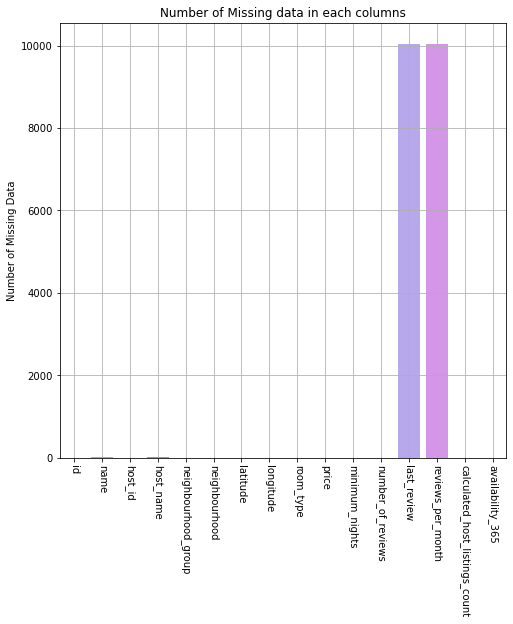

In [8]:
plt.figure(figsize = (8,8))
plt.title('Number of Missing data in each columns')
sns.barplot(data.isnull().sum().index , data.isnull().sum().values)
plt.ylabel('Number of Missing Data')
plt.grid()
plt.xticks(rotation = 270)
plt.show()

In [9]:
Data = data.fillna(method ='pad')

In [10]:
print('The number of nulls for each attributes are: ','\n')
print(Data.isnull().sum())

The number of nulls for each attributes are:  

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


**_Outliers_**

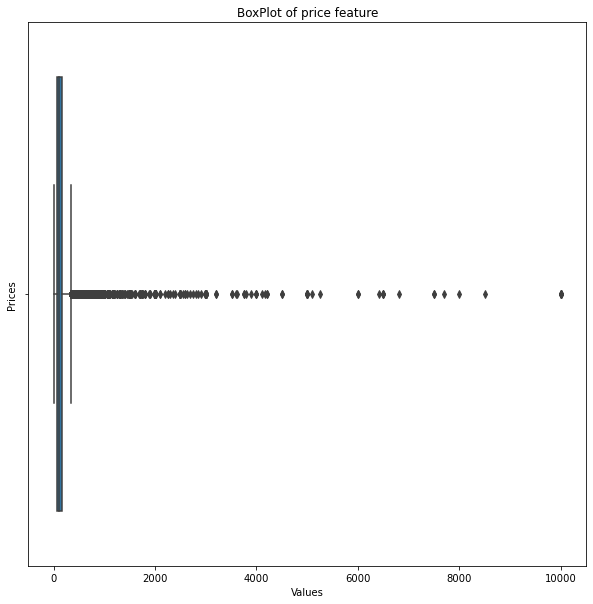

In [11]:
plt.figure(figsize = (10,10))
plt.title('BoxPlot of price feature')
sns.boxplot(Data['price'])
plt.xlabel('Values')
plt.ylabel('Prices')
plt.show()

In [12]:
## Calculating
Q1 = np.quantile(Data['price'], 0.25)
Q3 = np.quantile(Data['price'], 0.75)
IQR = Q3 - Q1
upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR
outliers = Data[(Data['price'] >= upper) | (Data['price'] <= lower)]
## Pure Dataset
Data = Data.drop(outliers.index)
##############################################################################
## Printing
print("Price IQR is :" , IQR)
print("Upper bounds is :" , upper)
print("Lower bounds is :" , lower)
print("Number of outliers are :" , len(outliers))


Price IQR is : 106.0
Upper bounds is : 334.0
Lower bounds is : -90.0
Number of outliers are : 2977


In [13]:
Data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.591800e+04,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,1.889785e+07,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,1.398443,6.620193,109.359358
std,1.091889e+07,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,1.690562,30.938400,130.272996
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.436114e+06,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,1.952542e+07,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.780000,1.000000,39.000000
75%,2.891184e+07,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,2.010000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


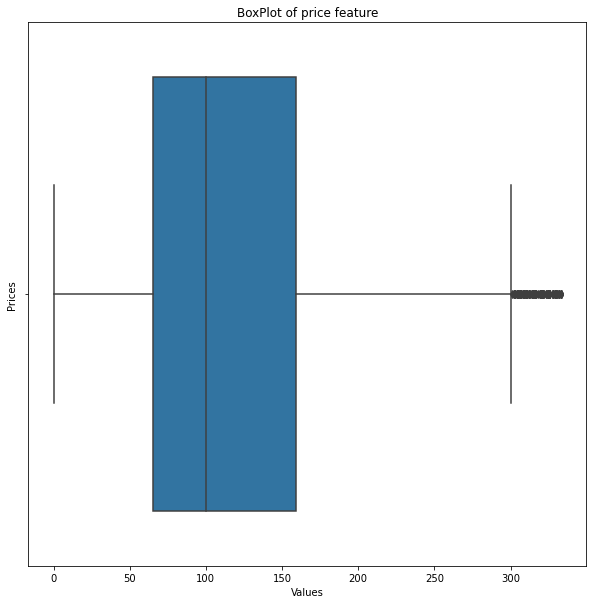

In [14]:
plt.figure(figsize = (10,10))
plt.title('BoxPlot of price feature')
sns.boxplot(Data['price'])
plt.xlabel('Values')
plt.ylabel('Prices')
plt.show()

In [15]:
len(Data)

45918

## General information

**ارایه اطلاعات کلی در حالت تجمیعی در خصوص اگهی از قبیل تعداد آ گهی ها ، تعداد
آ گهی ها در هر منطقه جغرافیایی ، بررسی شاخص های کلی قیمت و ... . لازم است حتما
در این بخش از بحث مصورسازی داده ها استفاده کنید و این اشکال ایجاد شده را تفسیر
کنی**

**_Histogram_**

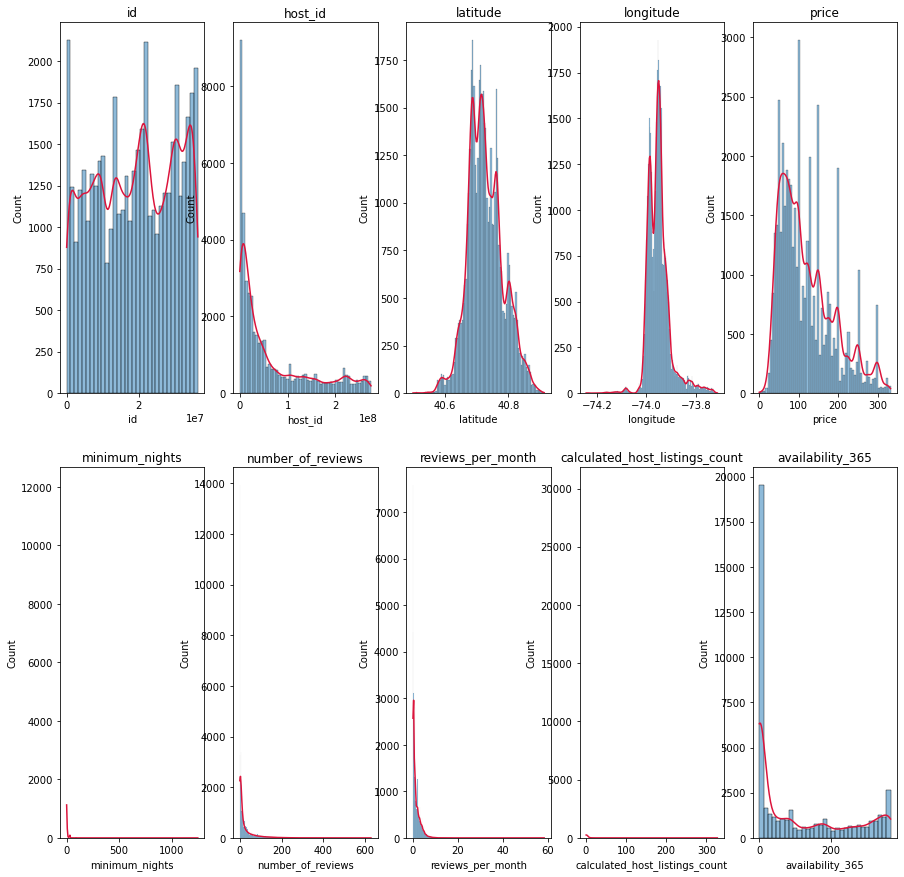

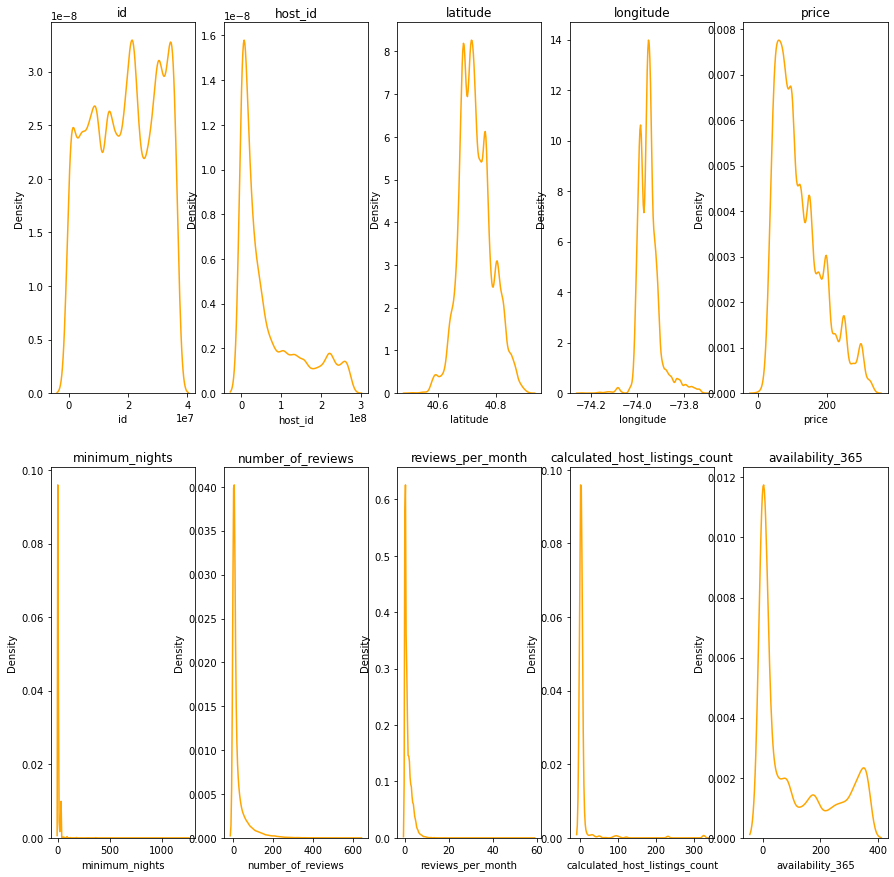

In [16]:
i = 0
fig1 , ax1 = plt.subplots(2,5,figsize = (15,15)) #, squeeze = False)
fig2 , ax2 = plt.subplots(2,5,figsize = (15,15)) #, squeeze = False)

ax1 = ax1.flatten()
ax2 = ax2.flatten()

for col in Data.describe().columns:
  sns.kdeplot(data = Data , x = col , ax = ax2[i],color = 'orange')
  ax2[i].set_title(col)
  sns.histplot(data = Data , x = col , ax = ax1[i] , kde= True)
  ax1[i].set_title(col)
  ax1[i].lines[0].set_color('crimson')
  i = i + 1
plt.show()

In [17]:
from scipy.stats import skew , kurtosis
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
for col in QanData.columns: 
  print(f"{color.RED+'Skewness'+color.END} of {color.BOLD + col + color.END} is {color.PURPLE + str(round(skew(Data[col].values),2)) + color.END} and the {color.RED+'kurtosis'+color.END}  is {color.PURPLE + str(round(kurtosis(Data[col].values),2)) + color.END} ")

Skewness of id is -0.08 and the kurtosis  is -1.22 
Skewness of host_id is 1.24 and the kurtosis  is 0.27 
Skewness of latitude is 0.26 and the kurtosis  is 0.09 
Skewness of longitude is 1.24 and the kurtosis  is 4.91 
Skewness of price is 0.92 and the kurtosis  is 0.17 
Skewness of minimum_nights is 21.94 and the kurtosis  is 884.54 
Skewness of number_of_reviews is 3.63 and the kurtosis  is 18.84 
Skewness of reviews_per_month is 2.98 and the kurtosis  is 36.49 
Skewness of calculated_host_listings_count is 8.43 and the kurtosis  is 77.03 
Skewness of availability_365 is 0.81 and the kurtosis  is -0.92 


In [18]:
Data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.591800e+04,4.591800e+04,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000,45918.000000
mean,1.889785e+07,6.632478e+07,40.728487,-73.950728,119.947014,6.935973,23.944945,1.398443,6.620193,109.359358
std,1.091889e+07,7.756044e+07,0.055334,0.046471,68.117249,19.857728,45.317122,1.690562,30.938400,130.272996
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.436114e+06,7.722615e+06,40.689230,-73.981920,65.000000,1.000000,1.000000,0.200000,1.000000,0.000000
50%,1.952542e+07,3.028359e+07,40.721770,-73.954360,100.000000,2.000000,5.000000,0.780000,1.000000,39.000000
75%,2.891184e+07,1.054798e+08,40.763390,-73.934310,159.000000,5.000000,24.000000,2.010000,2.000000,216.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,333.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


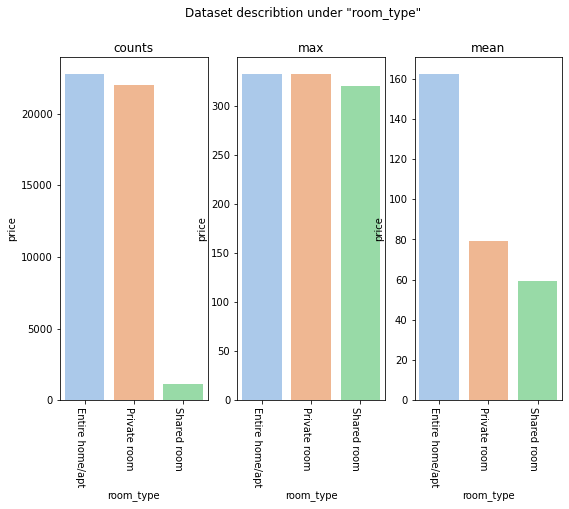

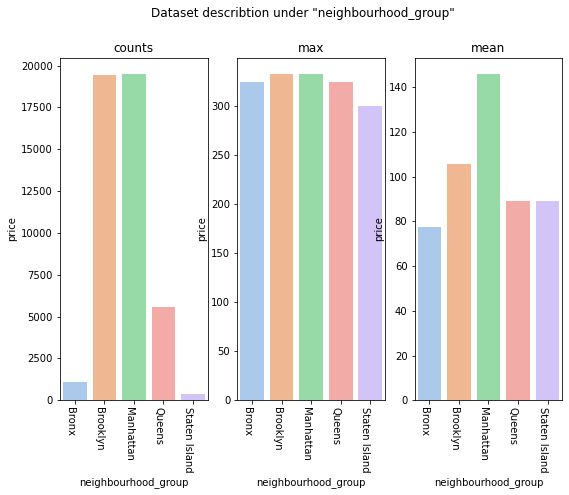

In [19]:
for col in ['room_type' , 'neighbourhood_group' ]:
  NG = Data.groupby(col)
  fig , ax = plt.subplots(1,3,figsize = (9,7))
  fig.suptitle(f'Dataset describtion under "{col}"')
  fig.autofmt_xdate(rotation= 270)

  sns.barplot(NG.count().index,NG.count()['price'],ax =ax[0] , palette="pastel")
  ax[0].set_title('counts')

  sns.barplot(NG.max().index,NG.max()['price'],ax =ax[1], palette="pastel")
  ax[1].set_title('max')


  sns.barplot(NG.mean().index,NG.mean()['price'],ax =ax[2] , palette="pastel")
  ax[2].set_title('mean')

plt.show()

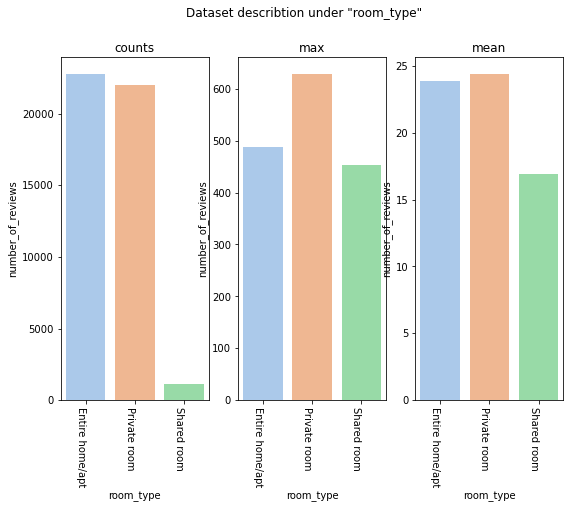

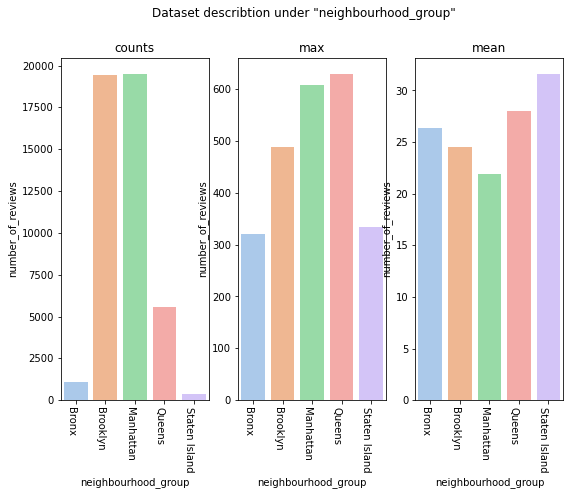

In [20]:
for col in ['room_type' , 'neighbourhood_group' ]:
  NG = Data.groupby(col)
  fig , ax = plt.subplots(1,3,figsize = (9,7))
  fig.suptitle(f'Dataset describtion under "{col}"')
  fig.autofmt_xdate(rotation= 270)

  sns.barplot(NG.count().index,NG.count()['number_of_reviews'],ax =ax[0] , palette="pastel")
  ax[0].set_title('counts')

  sns.barplot(NG.max().index,NG.max()['number_of_reviews'],ax =ax[1], palette="pastel")
  ax[1].set_title('max')


  sns.barplot(NG.mean().index,NG.mean()['number_of_reviews'],ax =ax[2] , palette="pastel")
  ax[2].set_title('mean')

plt.show()

In [21]:
Rooms = Data['room_type'].unique()
Groups = Data['neighbourhood_group'].unique()
Group_Room = pd.DataFrame(np.zeros([len(Groups) , len(Rooms)]) , index = Groups , columns = Rooms)
for G in Groups:
  for R in Rooms:
    Group_Room[R][G] = len(Data[(Data['neighbourhood_group'] == G) & (Data['room_type'] == R)]) / len(Data[(Data['neighbourhood_group'] == G)])

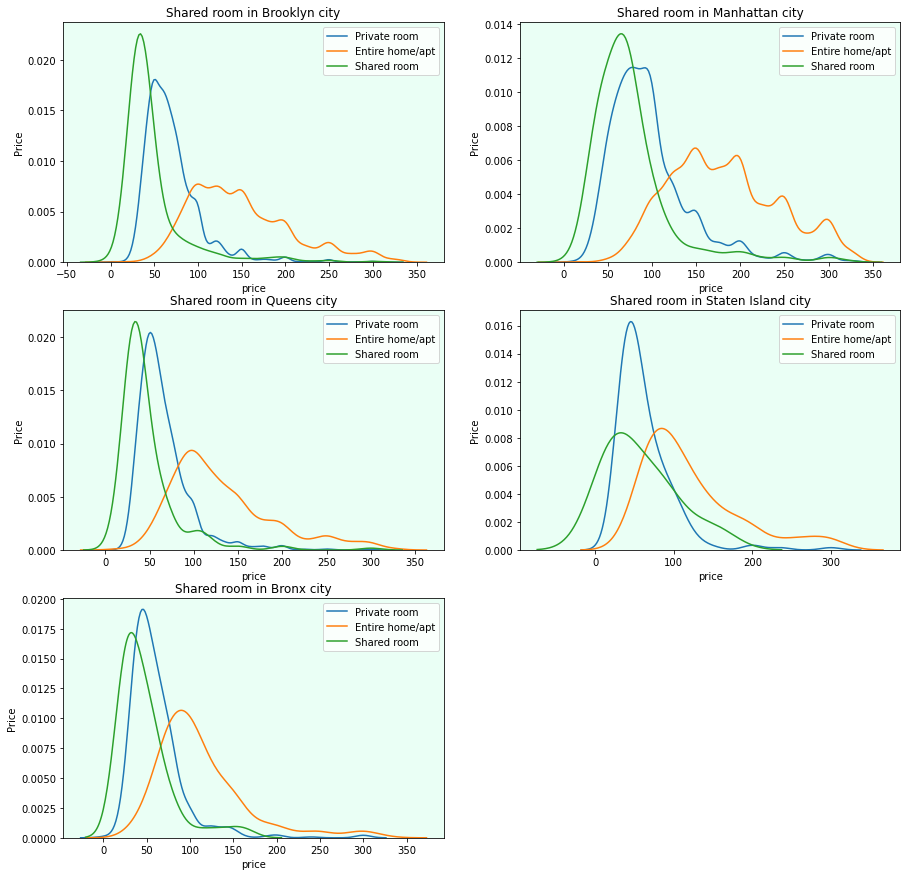

In [22]:
fig , ax = plt.subplots(3,2 , figsize = (15,15)) 
ax = ax.flatten()
i = 0
for G in Groups:
  for R in Rooms:
    sns.kdeplot(Data[(Data['neighbourhood_group'] == G) & (Data['room_type'] == R)]['price'] , ax = ax[i] , label = R)
    ax[i].set(ylabel = 'Price' , title = f"{R} in {G} city" , facecolor = '#eafff5')
    ax[i].legend()
  i += 1
fig.delaxes(ax[5])

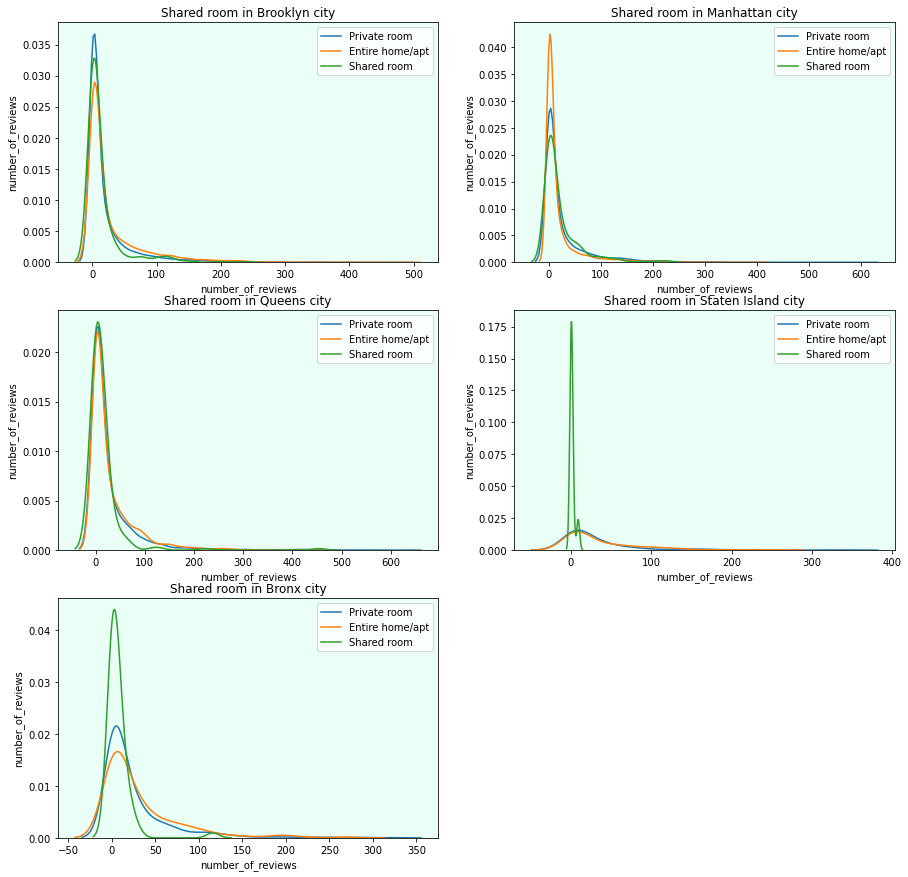

In [23]:
fig , ax = plt.subplots(3,2 , figsize = (15,15)) 
ax = ax.flatten()
i = 0
for G in Groups:
  for R in Rooms:
    sns.kdeplot(Data[(Data['neighbourhood_group'] == G) & (Data['room_type'] == R)]['number_of_reviews'] , ax = ax[i] , label = R)
    ax[i].set(ylabel = 'number_of_reviews' , title = f"{R} in {G} city" , facecolor = '#eafff5')
    ax[i].legend()
  i += 1
fig.delaxes(ax[5])

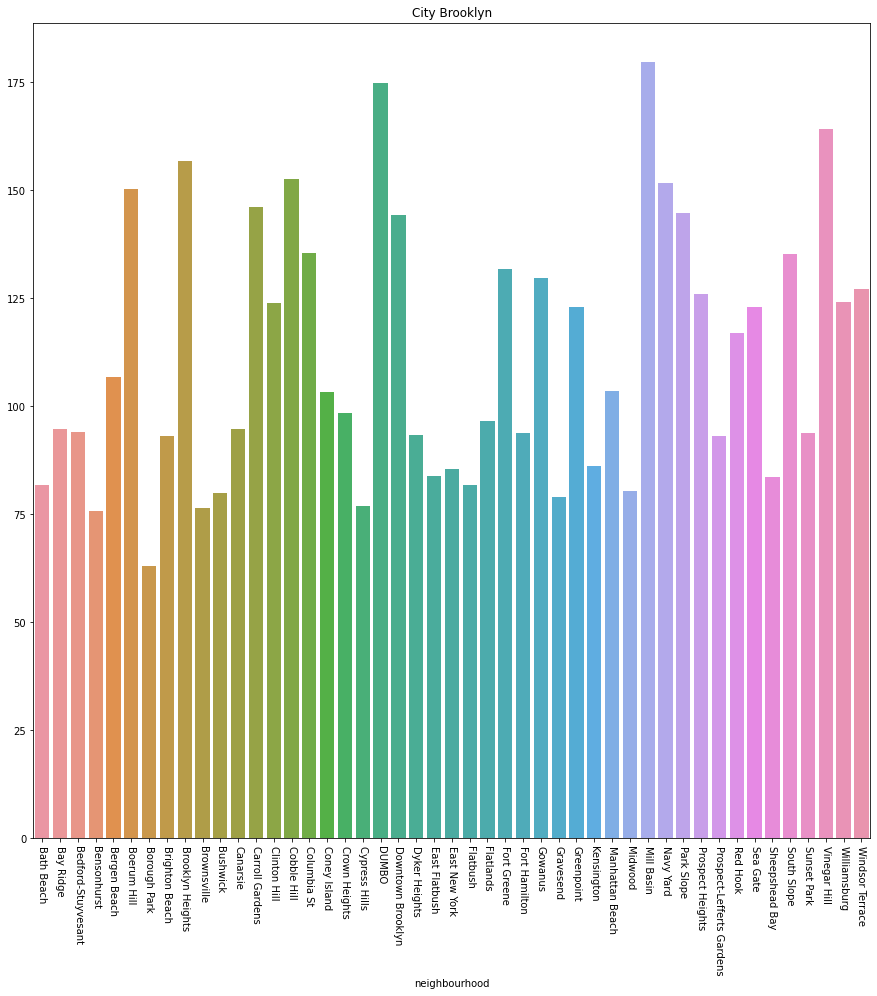

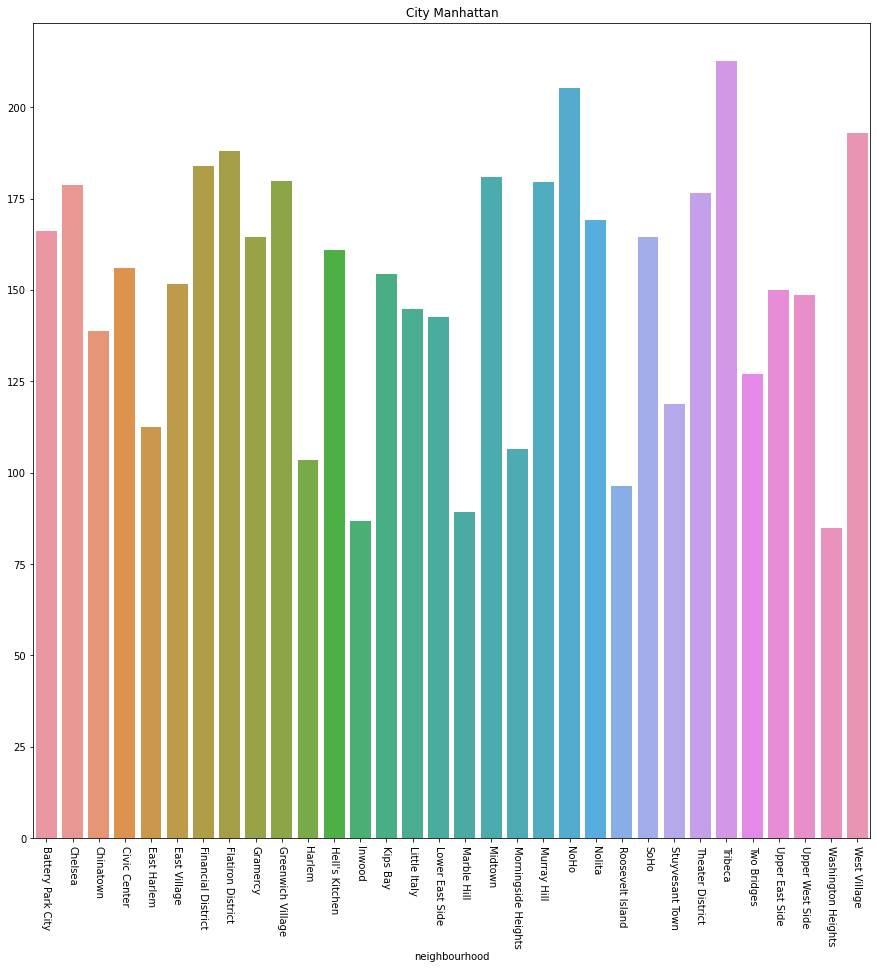

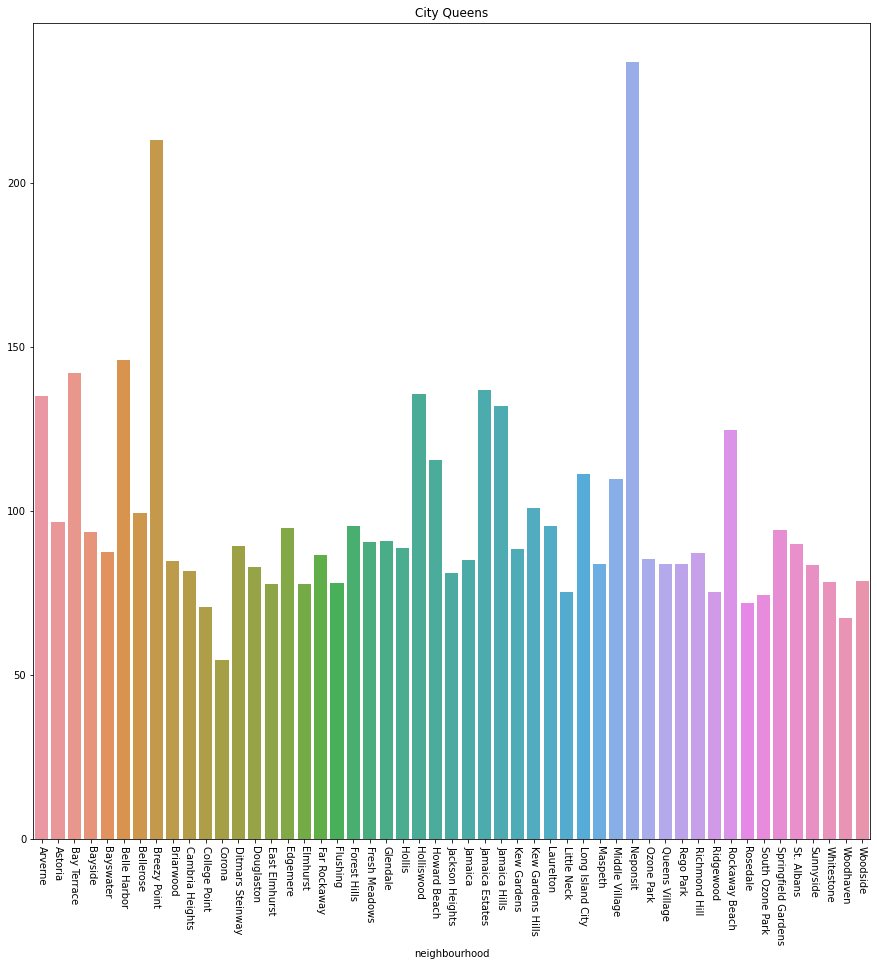

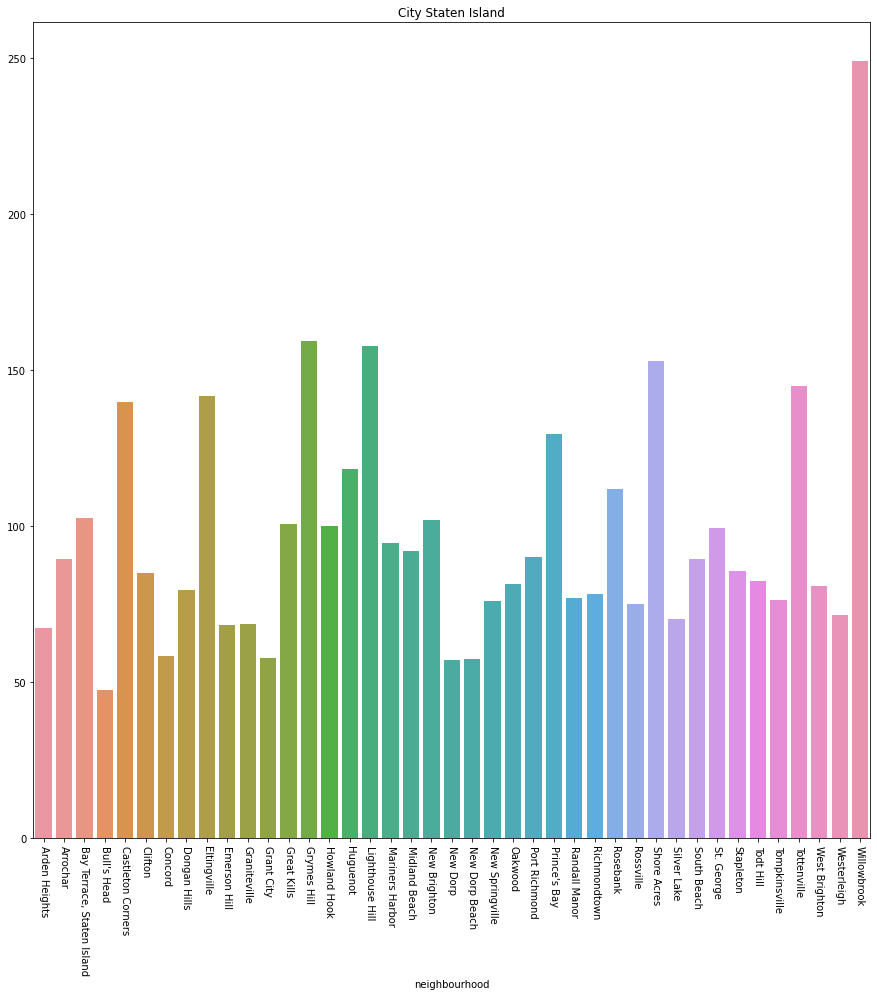

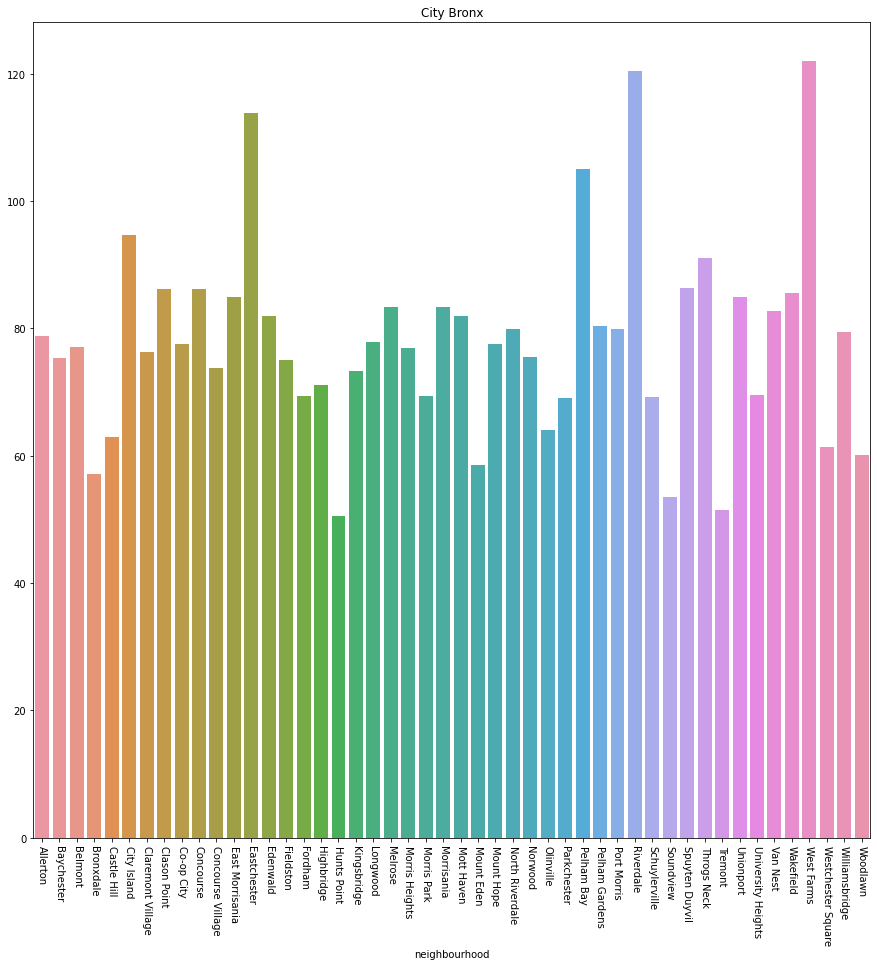

In [24]:
for G in Groups:
  b = Data[Data['neighbourhood_group'] == G].groupby('neighbourhood').mean()['price']
  plt.figure(figsize = (15,15))
  plt.title(f'City {G}')
  sns.barplot(b.index , b.values)
  plt.xticks(rotation = 270)
  plt.show()

##Maximum customers


**اگر تعداد کامنت های برای یک آ گهی را بتوان شاخصی از تعداد مشتریان در نظر گرفت
مطلوب است یافتن صاحبان آ گهی که بیشترین مشتری را دارا می باشند و بررسی علت
های آن**

In [25]:
MaximumReview = Data[Data['number_of_reviews'] == max(Data['number_of_reviews'])]
Data[Data['number_of_reviews'] == max(Data['number_of_reviews'])]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333


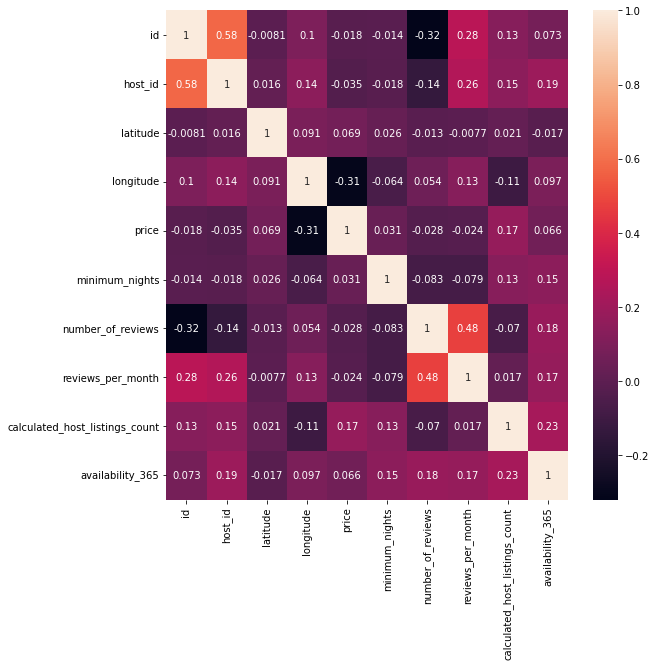

In [26]:
plt.figure(figsize = (9,9))
sns.heatmap(Data.corr(),annot = True)
plt.show()

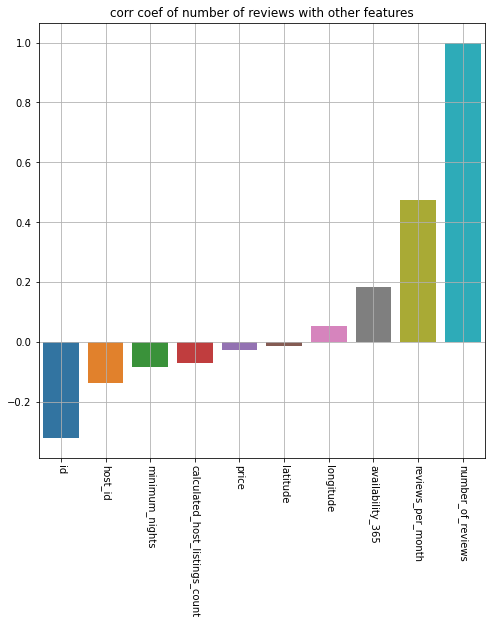

In [27]:
b = Data.corr()['number_of_reviews'].sort_values()
plt.figure(figsize = (8,8))
plt.title('corr coef of number of reviews with other features')
sns.barplot(b.index , b.values)
plt.xticks(rotation = 270)
plt.grid()
plt.show()


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

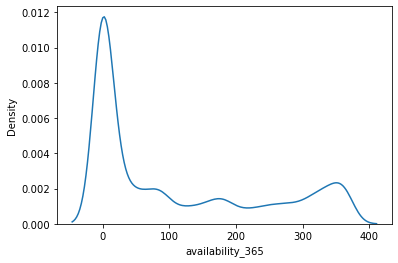

In [28]:
sns.kdeplot(data = Data['availability_365'])

In [29]:
Data['availability_365'][11759]

333

## Statistical hypothesis testing

**H0: People spend average 60 dollars for a room <br>
  H1: People doesn't spend average 60 dollars for a room**

In [30]:
from scipy.stats import ttest_1samp
alpha = 0.05 

tstat,p_value = scipy.stats.ttest_1samp(Data['price'] , popmean= 60.0)
print('t stat : {} , p_value : {}'.format(tstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

t stat : 188.5827386334005 , p_value : 0.0
reject null hypothesis


**H0: Neighbourhood group doesn't effect on price <br>H1: Neighbourhood group effects on price**

In [31]:
from scipy.stats import f_oneway
G1 = Data[Data['neighbourhood_group'] == Groups[0]]['price'].values
G2 = Data[Data['neighbourhood_group'] == Groups[1]]['price'].values
G3 = Data[Data['neighbourhood_group'] == Groups[2]]['price'].values
G4 = Data[Data['neighbourhood_group'] == Groups[3]]['price'].values
G5 = Data[Data['neighbourhood_group'] == Groups[4]]['price'].values
statistic , p_value = f_oneway(G1,G2,G3,G4,G5)
print('statistic is {} & p-value is {}'.format(statistic,p_value))
if p_value <= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

statistic is 1507.2687540462712 & p-value is 0.0
reject null hypothesis


**H0: People who apply for a Entire home, pay 20% more than the rest. <br> H1: People who apply for a Entire home, pay 20% less than the rest.**

In [32]:
from statsmodels.stats.weightstats import ztest
PrivateRoom = Data[Data['room_type'] == 'Entire home/apt']
OtherRoom = Data.drop(PrivateRoom.index)
statistic , p_value = ztest(OtherRoom['price'] , PrivateRoom['price'] , value = 0.2)
print('statistic is {} & p-value is {}'.format(statistic,p_value))
if p_value <= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

statistic is -169.64363251226828 & p-value is 0.0
reject null hypothesis


**H0: Neighbourhood group effect on the number of reviews <br> H1: Neighbourhood group doesn't effect on the number of reviews**

In [34]:
Brooklyn = Data[Data['neighbourhood_group'] == 'Brooklyn']
Manhattan = Data[Data['neighbourhood_group'] == 'Manhattan']
Staten_Island = Data[Data['neighbourhood_group'] == 'Staten Island']
Bronx = Data[Data['neighbourhood_group'] == 'Bronx']

In [35]:
alpha = 0.05 
fstat,p_value = scipy.stats.f_oneway(Brooklyn['number_of_reviews'] ,Manhattan['number_of_reviews'] ,Staten_Island['number_of_reviews'],Bronx['number_of_reviews'] )

print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 16.82124151547754 , p_value : 6.461275942530628e-11
reject null hypothesis


**H0: The number of reviews has effect on price     
H1: the number of reviews doesn't have effect on price**

In [46]:
alpha = 0.05 
fstat,p_value = scipy.stats.ttest_ind(Data['price'],Data['number_of_reviews'])
print('f stat : {} , p_value : {}'.format(fstat,p_value))
if p_value<= alpha:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f stat : 251.4445095533491 , p_value : 0.0
reject null hypothesis


## Model Generation

**_Preprocessing_**

In [37]:
InputData = Data.copy()
InputData = InputData.drop(columns = ['id' , 'host_id' , 'name' , 'host_name','last_review'])
y = InputData['price'].values
X = InputData.drop(columns = ['price'])._get_numeric_data().values
for col in ['neighbourhood_group' , 'neighbourhood' , 'room_type']:
  X = np.c_[X,pd.get_dummies(InputData[col]).values]

**Train Test Split**

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Standard Scaler**

In [39]:
from sklearn.preprocessing import MinMaxScaler
X_train[:,0:6] = MinMaxScaler().fit_transform(X_train[:,0:6])
X_test[:,0:6] = MinMaxScaler().fit_transform(X_test[:,0:6])
y_train = MinMaxScaler().fit_transform(y_train.reshape(-1,1))
y_test = MinMaxScaler().fit_transform(y_test.reshape(-1,1))

**Model Selection - Model Fitting - Model Evaluation** 

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

kf = KFold(n_splits=10)
LinearModel = LinearRegression() 
TrainEvalR2 = []
TestEvalR2 = []

TrainEvalmse = []
TestEvalmse = []

TrainEvalmae = []
TestEvalmae = []

for train_index , test_index in kf.split(X_train):
    LinearModel.fit(X_train[train_index], y_train[train_index])
    y_pre_train = LinearModel.predict(X_train[train_index]) 
    y_pre_test = LinearModel.predict(X_train[test_index])
    
    TrainEvalR2.append(r2(y_train[train_index] , y_pre_train))
    TestEvalR2.append(r2(y_train[test_index] , y_pre_test))

    TrainEvalmse.append(mse(y_train[train_index] , y_pre_train))
    TestEvalmse.append(mse(y_train[test_index] , y_pre_test))

    TrainEvalmae.append(mae(y_train[train_index] , y_pre_train))
    TestEvalmae.append(mae(y_train[test_index] , y_pre_test))


**Model Evaluation Plot**

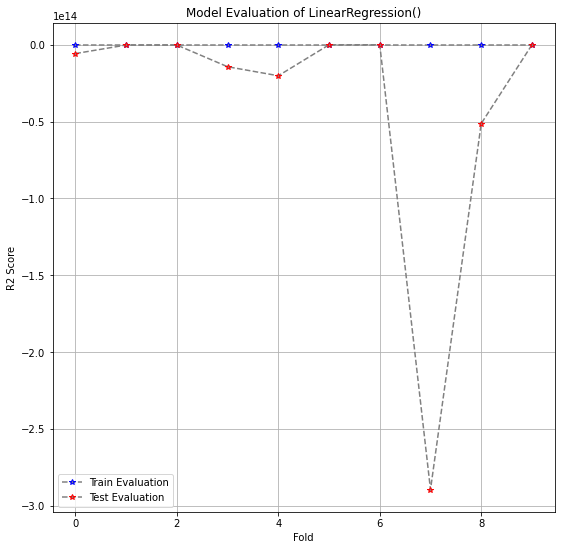

In [41]:
plt.figure(figsize = (9,9))
plt.title(f'Model Evaluation of {LinearModel}')
plt.plot(TrainEvalR2 , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'blue' , label = 'Train Evaluation')
plt.plot(TestEvalR2 , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'red' , label = 'Test Evaluation')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.grid()
plt.show()


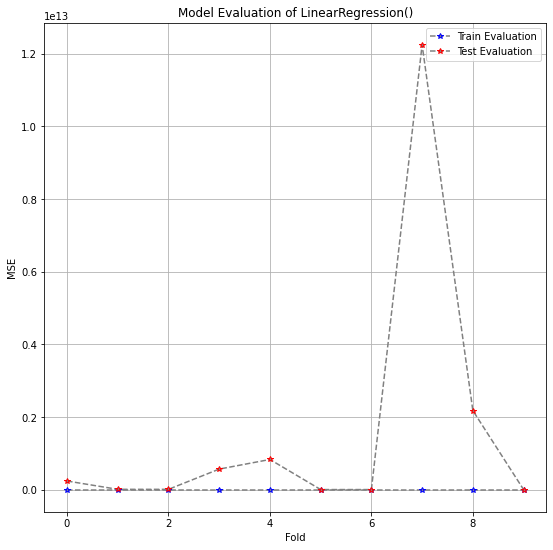

In [42]:
plt.figure(figsize = (9,9))
plt.title(f'Model Evaluation of {LinearModel}')
plt.plot(TrainEvalmse , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'blue' , label = 'Train Evaluation')
plt.plot(TestEvalmse , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'red' , label = 'Test Evaluation')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('MSE')
plt.grid()
plt.show()


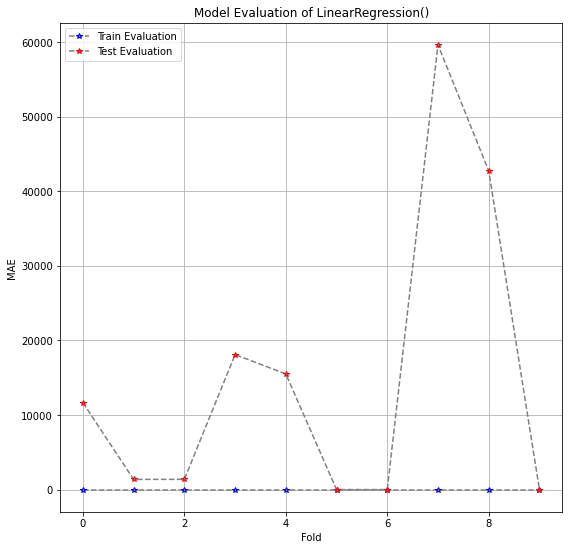

In [43]:
plt.figure(figsize = (9,9))
plt.title(f'Model Evaluation of {LinearModel}')
plt.plot(TrainEvalmae , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'blue' , label = 'Train Evaluation')
plt.plot(TestEvalmae , marker = '*' , linestyle = '--' , color = 'gray' , markeredgecolor = 'red' , label = 'Test Evaluation')
plt.legend()
plt.xlabel('Fold')
plt.ylabel('MAE')
plt.grid()
plt.show()


**Validation Evaluation**

In [44]:
y_val = LinearModel.predict(X_test)
print(f"MSE value for validation is {round(mse(y_test,y_val),2)}")
print(f"MAE value for validation is {round(mae(y_test,y_val),2)}")
print(f"R2-score value for validation is {round(r2(y_test,y_val),2)}")

MSE value for validation is 28952776223.61
MAE value for validation is 2246.0
R2-score value for validation is -675550438311.28
